In [4]:
import pandas as pd
from scipy import stats
import numpy as np


In [5]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
df=pd.read_csv("marketing_DataSet.csv")
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10 non-null     int64 
 1   Year_Birth           10 non-null     int64 
 2   Education            10 non-null     object
 3   Marital_Status       10 non-null     object
 4   Income               10 non-null     int64 
 5   Kidhome              10 non-null     int64 
 6   Teenhome             10 non-null     int64 
 7   Dt_Customer          10 non-null     object
 8   Recency              10 non-null     int64 
 9   MntWines             10 non-null     int64 
 10  MntFruits            10 non-null     int64 
 11  MntMeatProducts      10 non-null     int64 
 12  MntFishProducts      10 non-null     int64 
 13  MntSweetProducts     10 non-null     int64 
 14  MntGoldProds         10 non-null     int64 
 15  NumDealsPurchases    10 non-null     int64 
 16  NumWebPurch

In [7]:
 df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1,1988,Graduation,Single,38431,0,1,2019-01-01,77,476,...,4,8,0,0,1,1,1,0,1,India
1,2,1978,PhD,Divorced,22747,2,0,2019-01-02,80,702,...,5,3,1,1,0,1,0,1,1,Germany
2,3,1964,Master,Married,79150,2,1,2019-01-03,35,401,...,3,8,1,0,0,1,1,0,0,France
3,4,1992,Graduation,Widow,85725,0,0,2019-01-04,49,729,...,9,2,1,1,0,0,1,0,0,France
4,5,1957,PhD,Divorced,55773,0,1,2019-01-05,3,555,...,6,6,0,0,0,0,1,0,1,Germany


In [8]:
meanT=float(df.MntWines.mean())
meanT

544.6

In [9]:
float(df.MntGoldProds.mean())

47.0

In [10]:
float(df.MntFruits.mean())

65.2

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,...,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,1973.700000,61589.500000,0.900000,1.100000,35.900000,544.600000,65.200000,271.200000,82.50000,...,5.000000,4.90000,5.100000,0.700000,0.600000,0.300000,0.500000,0.700000,0.500000,0.500000
std,3.02765,12.347289,24765.599323,0.875595,0.875595,31.142861,297.827765,25.023544,107.403497,53.87898,...,2.538591,3.17805,2.806738,0.483046,0.516398,0.483046,0.527046,0.483046,0.527046,0.527046
min,1.00000,1957.000000,22747.000000,0.000000,0.000000,1.000000,161.000000,14.000000,52.000000,8.00000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.25000,1965.000000,41711.000000,0.000000,0.250000,3.500000,302.000000,50.500000,221.000000,45.50000,...,3.250000,3.25000,3.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
50%,5.50000,1971.000000,66329.500000,1.000000,1.000000,42.000000,515.500000,74.000000,265.000000,72.00000,...,5.500000,5.50000,5.500000,1.000000,1.000000,0.000000,0.500000,1.000000,0.500000,0.500000
75%,7.75000,1985.500000,84081.250000,1.750000,2.000000,53.000000,722.250000,82.750000,358.750000,133.25000,...,6.000000,7.50000,7.750000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000
max,10.00000,1992.000000,87435.000000,2.000000,2.000000,80.000000,995.000000,94.000000,409.000000,156.00000,...,9.000000,9.00000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
wins_mean=float(df.MntWines.mean())
wines_median=float(df.MntWines.median())
print(wins_mean,wines_median)

##we did not see any variations between mean and median so there is no extreme observatiosn 
## if you see any deferecne then we can check the min and max of the values and can analyse

544.6 515.5


In [13]:
float(df.MntWines.std())

297.82776529023914

In [14]:
float(stats.median_abs_deviation(df["MntWines"]))

230.0

In [15]:

float(stats.iqr(df["MntWines"]))

420.25

In [16]:
float(np.percentile(df["MntWines"],25))

302.0

In [17]:
float(np.percentile(df["MntWines"],75))

722.25

<Axes: >

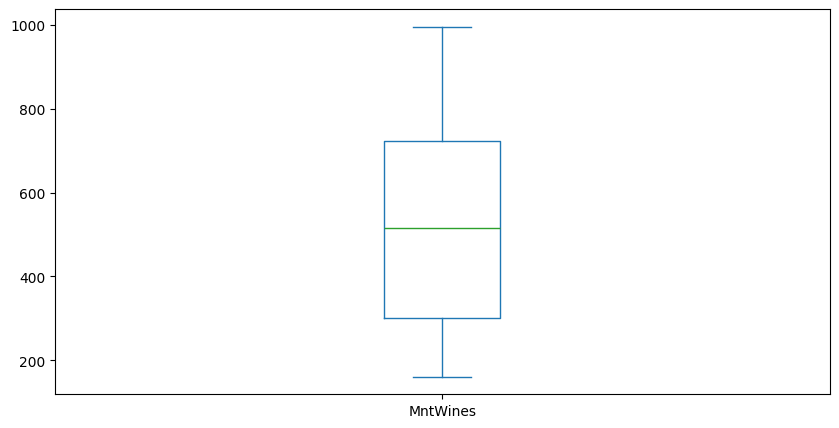

In [18]:
df["MntWines"].plot.box(figsize=(10,5))

<Axes: ylabel='Frequency'>

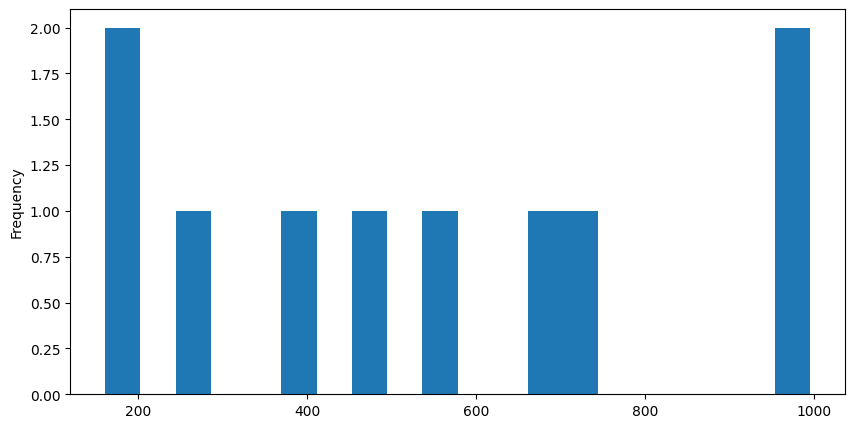

In [19]:
df["MntWines"].plot.hist(figsize=(10,5),bins=20)

In [20]:
def cleanincome(x):
    if isinstance(x,str):
        return float(x).replace(",","")

In [21]:
df["Income"]=df["Income"].map(lambda x:cleanincome(x))

In [22]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1,1988,Graduation,Single,None,0,1,2019-01-01,77,476,...,4,8,0,0,1,1,1,0,1,India
1,2,1978,PhD,Divorced,None,2,0,2019-01-02,80,702,...,5,3,1,1,0,1,0,1,1,Germany
2,3,1964,Master,Married,None,2,1,2019-01-03,35,401,...,3,8,1,0,0,1,1,0,0,France
3,4,1992,Graduation,Widow,None,0,0,2019-01-04,49,729,...,9,2,1,1,0,0,1,0,0,France
4,5,1957,PhD,Divorced,None,0,1,2019-01-05,3,555,...,6,6,0,0,0,0,1,0,1,Germany
5,6,1970,2n Cycle,Single,None,2,2,2019-01-06,1,161,...,8,5,0,1,1,1,1,1,1,France
6,7,1988,Master,Single,None,1,2,2019-01-07,5,201,...,6,7,1,1,0,0,1,1,0,Germany
7,8,1968,2n Cycle,Together,None,0,0,2019-01-08,53,957,...,0,8,1,1,0,0,0,0,0,Canada
8,9,1972,Master,Together,None,1,2,2019-01-09,3,995,...,0,4,1,1,0,0,1,1,1,Germany
9,10,1960,PhD,Married,None,1,2,2019-01-10,53,269,...,8,0,1,0,1,1,0,1,0,Germany


In [23]:
df=pd.read_csv("marketing_DataSet.csv")

In [24]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1,1988,Graduation,Single,38431,0,1,2019-01-01,77,476,...,4,8,0,0,1,1,1,0,1,India
1,2,1978,PhD,Divorced,22747,2,0,2019-01-02,80,702,...,5,3,1,1,0,1,0,1,1,Germany
2,3,1964,Master,Married,79150,2,1,2019-01-03,35,401,...,3,8,1,0,0,1,1,0,0,France
3,4,1992,Graduation,Widow,85725,0,0,2019-01-04,49,729,...,9,2,1,1,0,0,1,0,0,France
4,5,1957,PhD,Divorced,55773,0,1,2019-01-05,3,555,...,6,6,0,0,0,0,1,0,1,Germany
5,6,1970,2n Cycle,Single,87435,2,2,2019-01-06,1,161,...,8,5,0,1,1,1,1,1,1,France
6,7,1988,Master,Single,76886,1,2,2019-01-07,5,201,...,6,7,1,1,0,0,1,1,0,Germany
7,8,1968,2n Cycle,Together,86803,0,0,2019-01-08,53,957,...,0,8,1,1,0,0,0,0,0,Canada
8,9,1972,Master,Together,51551,1,2,2019-01-09,3,995,...,0,4,1,1,0,0,1,1,1,Germany
9,10,1960,PhD,Married,31394,1,2,2019-01-10,53,269,...,8,0,1,0,1,1,0,1,0,Germany


<Axes: >

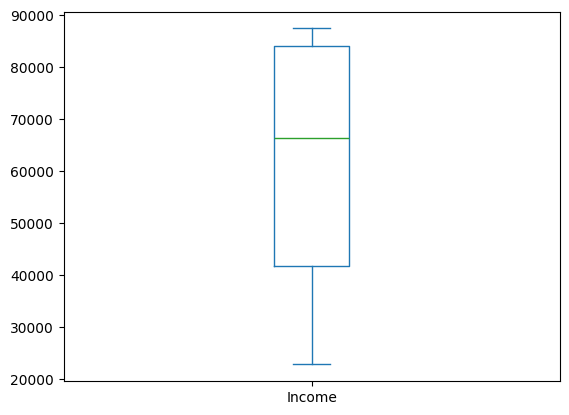

In [25]:
df["Income"].plot.box()

In [26]:
int(df["Income"].max())

87435

In [27]:
df["Income"]

0    38431
1    22747
2    79150
3    85725
4    55773
5    87435
6    76886
7    86803
8    51551
9    31394
Name: Income, dtype: int64

In [28]:
df["Income"]=np.where(df["Income"]<50000,100000,df["Income"])

In [29]:
df["Income"]

0    100000
1    100000
2     79150
3     85725
4     55773
5     87435
6     76886
7     86803
8     51551
9    100000
Name: Income, dtype: int64

<Axes: >

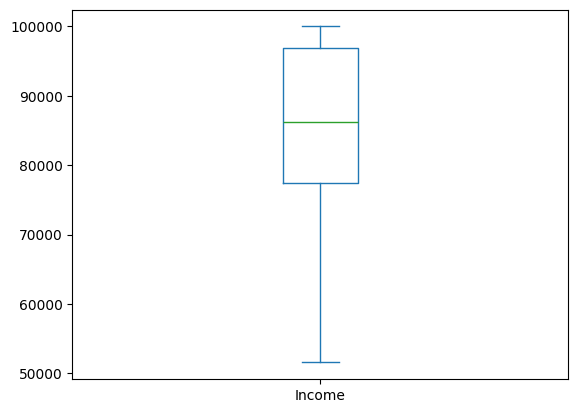

In [30]:
df["Income"].plot.box()

<Axes: xlabel='Education'>

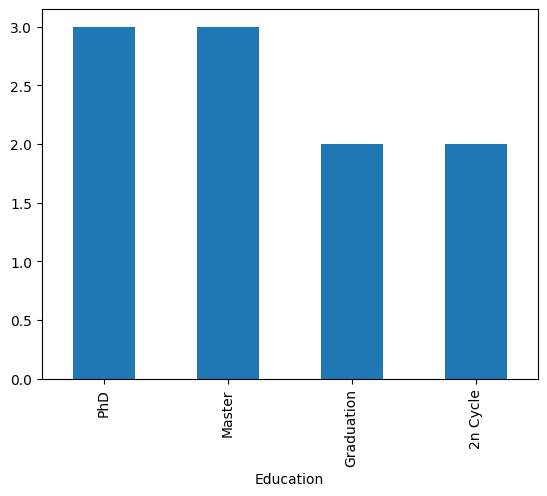

In [33]:
df["Education"].value_counts().plot.bar()

<Axes: xlabel='Income', ylabel='MntWines'>

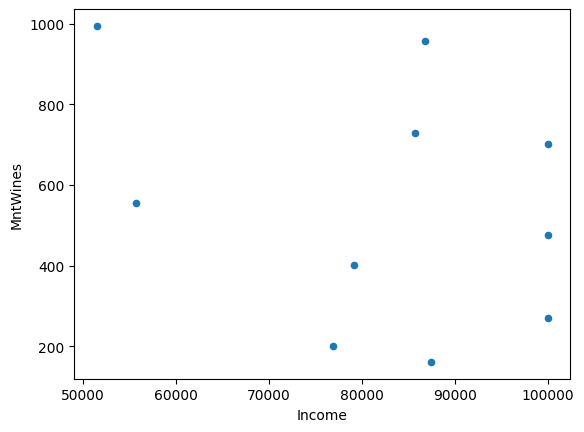

In [34]:
df.plot.scatter("Income","MntWines")

<Axes: >

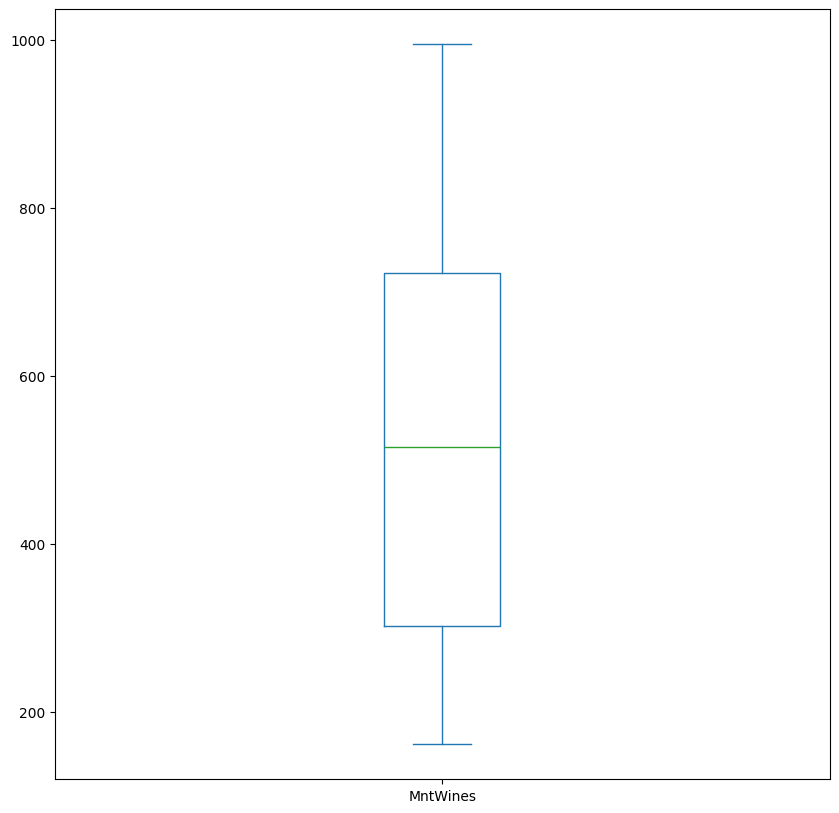

In [ ]:
df.plot.box(x="Education",y="MntWines",figsize=(10,10))

MntWines    Axes(0.125,0.11;0.775x0.77)
dtype: object

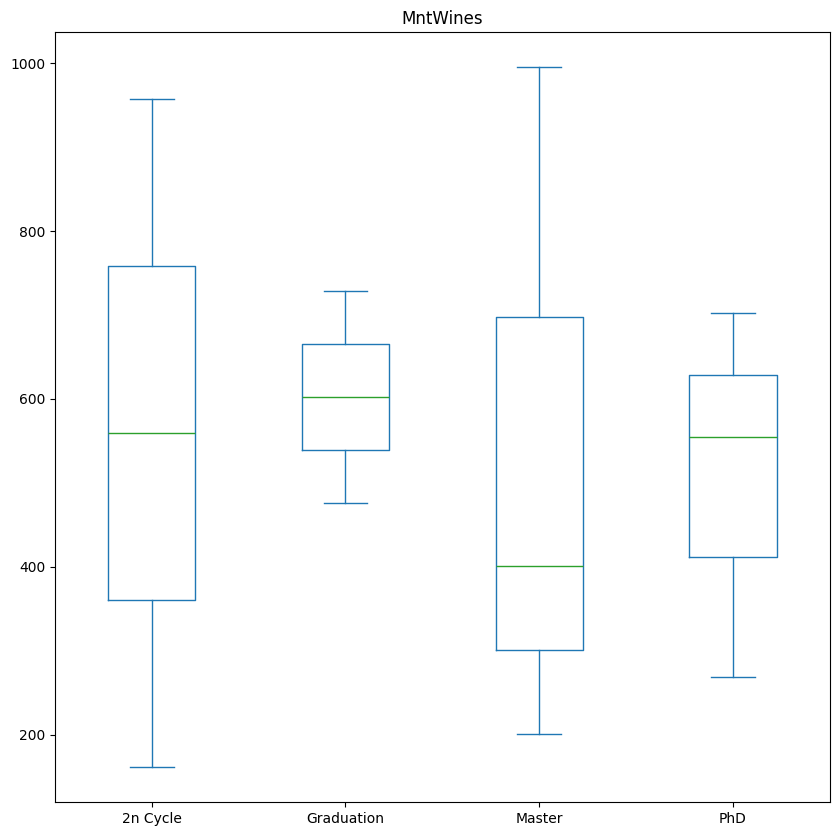

In [36]:
df.plot.box(by="Education",column="MntWines",figsize=(10,10))